## Amazon Data analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Amazon Sale Report.csv")
df

C:\Users\harjo\AppData\Local\Temp\ipykernel_14576\1170330508.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


# Cleaning data

In [4]:
# Normalize column name
state_col = None
for c in df.columns:
    if "state" in c.lower():
        state_col = c
        break

df[state_col] = df[state_col].astype(str).str.strip().str.title()

# FULL STATE CORRECTION DICTIONARY
fix_states = {
    "Rajshthan": "Rajasthan",
    "Rajashtan": "Rajasthan",
    "Maharastra": "Maharashtra",
    "Maharastra ": "Maharashtra",
    "Uttarpradesh": "Uttar Pradesh",
    "Uttar Pradesh ": "Uttar Pradesh",
    "Tamilnadu": "Tamil Nadu",
    "Andra Pradesh": "Andhra Pradesh",
    "Andhra Pradesh ": "Andhra Pradesh",
    "Karnatak": "Karnataka",
    "Telengana": "Telangana",
    "J&K": "Jammu And Kashmir",
    "Jammu & Kashmir": "Jammu And Kashmir",
    "Dl": "Delhi",
    "D.l": "Delhi",
    "Delhi/Ncr": "Delhi",
    "Ar" : "Arunachal Pradesh",
    "Pb": "Punjab",
    "P.B": "Punjab",
    "Punjab/Mohali/Zirakpur": "Punjab",
    "Punjab/Mohali": "Punjab",

    "Rj": "Rajasthan",
    "Raj": "Rajasthan",
"Maharastra": "Maharashtra",
    "Maharastra ": "Maharashtra",
    "Rajsthan": "Rajasthan",
    "Rajashtan": "Rajasthan",
    "Odisa": "Odisha",
    "Orissa": "Odisha",
    "Uttrakhand": "Uttarakhand",
    "Uttaranchal": "Uttarakhand",
    "Andra Pradesh": "Andhra Pradesh",
    "Andhra Pradesh ": "Andhra Pradesh",
    "Tamilnadu": "Tamil Nadu",
    "Karnatak": "Karnataka",
    "Telengana": "Telangana",
    "J&K": "Jammu And Kashmir",
    "Jammu & Kashmir": "Jammu And Kashmir",
    "Nl": "Nagaland",
    "Unknown": "Other",
    "Lakshadweep ": "Lakshadweep"
    "Ar" "Arunachal Pradesh",

    "Ni": "Nagaland",   # adjust if needed
    "Ne": "Nagaland",

    "Orissa": "Odisha",
    "Odisa": "Odisha",

    "Pondicherry": "Puducherry",
    "Pondi": "Puducherry",

    "Andaman & Nicobar": "Andaman And Nicobar Islands",
    "Andaman Nicobar": "Andaman And Nicobar Islands",

    "U.P": "Uttar Pradesh",
    "Up": "Uttar Pradesh",

    "Mh": "Maharashtra",
    "Mharashtra": "Maharashtra",
    "Maharastra": "Maharashtra",

    "Nan": "Unknown",
    "Apo": "Unknown",   # no meaning, put Unknown
    "Ar.": "Arunachal Pradesh"
}

# APPLY CLEANING
df[state_col] = df[state_col].replace(fix_states)

# Remove weird characters
df[state_col] = (
    df[state_col]
    .str.replace("/", " ", regex=False)
    .str.replace("&", "and", regex=False)
    .str.replace("\.", "", regex=True)
    .str.strip()
)

# TITLE CASE
df[state_col] = df[state_col].str.title()

In [5]:
df = df.dropna(axis=1, how='all')      # remove columns completely empty
df = df.loc[:, ~df.columns.str.contains('Unnamed')]     # remove unnamed columns

In [6]:
if 'Status' in df.columns:
    df['Status'] = df['Status'].astype(str).str.lower().str.strip()

In [7]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

C:\Users\harjo\AppData\Local\Temp\ipykernel_14576\3256828230.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [8]:
amount_cols = ['Amount', 'amount', 'Total', 'total', 'item-total']

for col in amount_cols:
    if col in df.columns:
        df[col] = (
            df[col].astype(str)
            .str.replace("₹", "", regex=False)
            .str.replace(",", "", regex=False)
            .str.strip()
            .replace("", 0)
            .astype(float)
        )

In [9]:
df = df.drop_duplicates()

In [10]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

 Total revenue

In [11]:
df ["Amount"].sum()

np.float64(78592678.29999998)

Revenue Category wise 

In [12]:
df.groupby("Category")["Amount"].sum()


Category
Blouse             458408.18
Bottom             150667.98
Dupatta               915.00
Ethnic Dress       791217.66
Saree              123933.76
Set              39204124.03
Top               5347792.30
Western Dress    11216072.69
kurta            21299546.70
Name: Amount, dtype: float64

CATEGORY-WISE TOTAL SALES AMOUNT

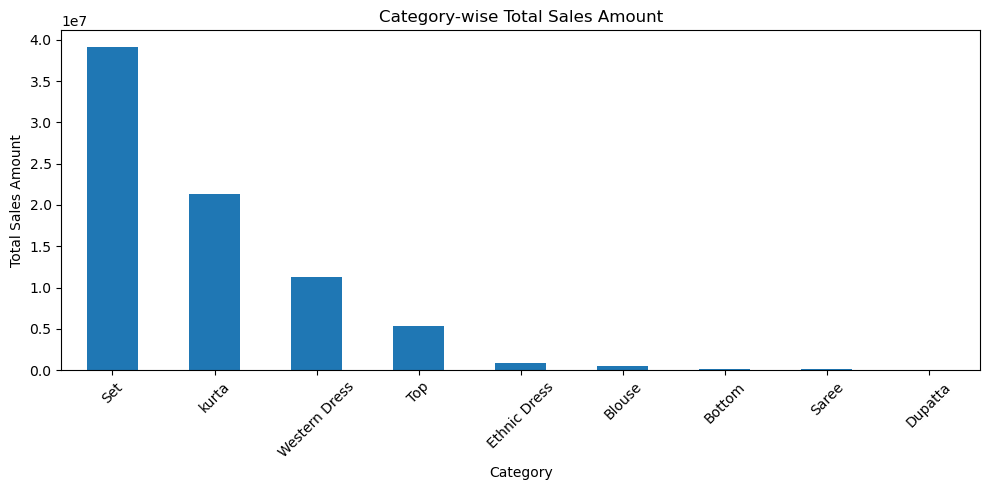

In [ ]:
# Clean amount column
df['Amount'] = (
    df['Amount'].astype(str)
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

plt.figure(figsize=(10,5))
df.groupby('Category')['Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Total Sales Amount")
plt.title("Category-wise Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NO OF PRODUCTS SELL BY AMAZON AND MERCHANTS

In [13]:
df.groupby("Fulfilment")["Qty"].sum()

Fulfilment
Amazon      84087
Merchant    32562
Name: Qty, dtype: int64

QUANTITY SOLD CATEGORY WISE

In [14]:
df.groupby("Category")["Qty"].count().sort_values(ascending=True)

Category
Dupatta              3
Saree              164
Bottom             440
Blouse             926
Ethnic Dress      1159
Top              10622
Western Dress    15500
kurta            49877
Set              50284
Name: Qty, dtype: int64

CATEGORY-WISE COUNT GRAPH

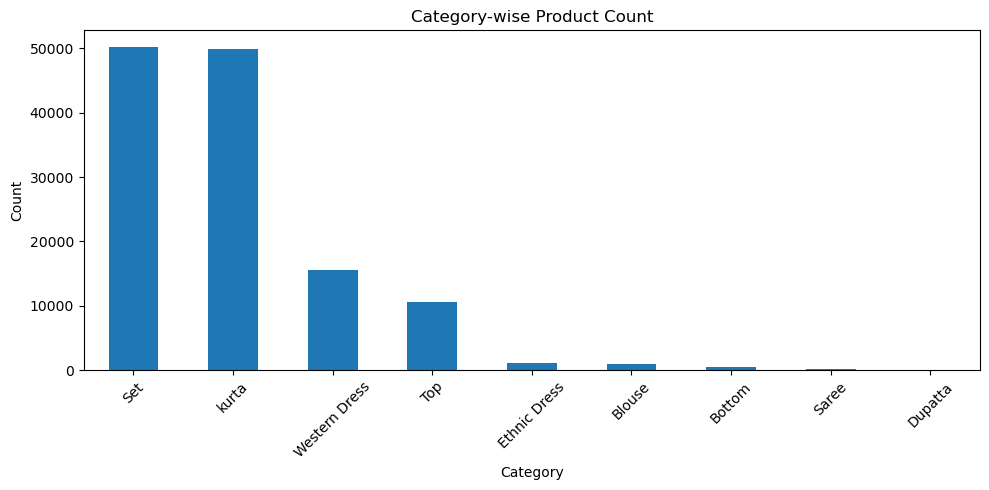

In [ ]:
plt.figure(figsize=(10,5))
df['Category'].value_counts().plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category-wise Product Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Count how many times each product was cancelled

In [15]:
cancelled_df = df[df['Status'] == 'cancelled']
# Count how many times each product was cancelled
cancel_count = cancelled_df['Category'].value_counts().sort_values(ascending=True)
print(cancel_count)

Category
Saree              21
Bottom             60
Blouse            116
Ethnic Dress      145
Top              1276
Western Dress    2122
kurta            7255
Set              7337
Name: count, dtype: int64


CATEGORY-WISE CANCELLED ORDERS

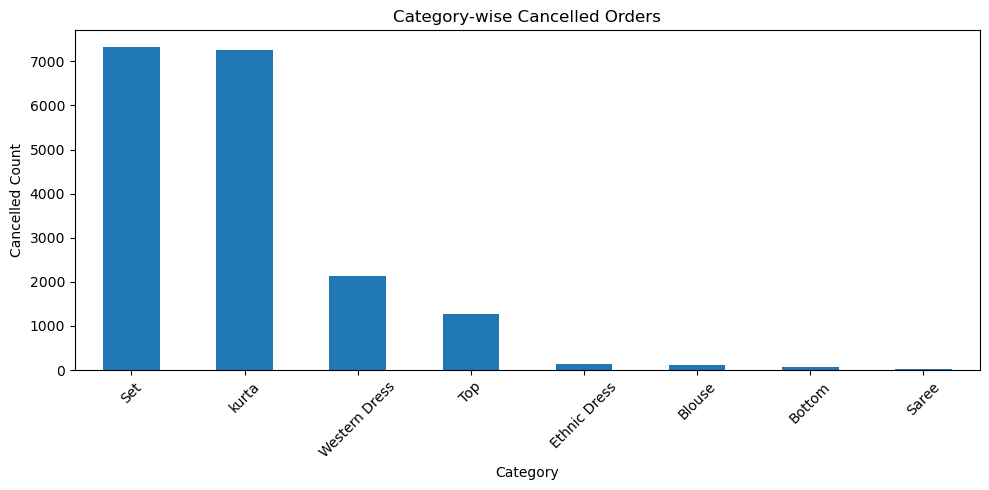

In [ ]:
cancelled = df[df['Status'].str.lower().str.contains("cancel")]

plt.figure(figsize=(10,5))
cancelled['Category'].value_counts().plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Cancelled Count")
plt.title("Category-wise Cancelled Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

STATE WISE TOTAL QTY

In [25]:
df.groupby("ship-state")["Qty"].sum().sort_values(ascending=True)

ship-state
Lakshadweep                        3
Unknown                           28
Ladakh                            40
Dadra And Nagar                   58
Mizoram                           69
New Delhi                         72
Tripura                          134
Arunachal Pradesh                135
Sikkim                           182
Nagaland                         183
Meghalaya                        184
Andaman And Nicobar Islands      226
Manipur                          294
Chandigarh                       304
Puducherry                       310
Jammu And Kashmir                617
Himachal Pradesh                 675
Chhattisgarh                     822
Goa                             1055
Jharkhand                       1284
Uttarakhand                     1385
Assam                           1483
Punjab                          1744
Bihar                           1875
Odisha                          1911
Madhya Pradesh                  2260
Rajasthan                  

State-wise Order Count Heat (Horizontal Bar)

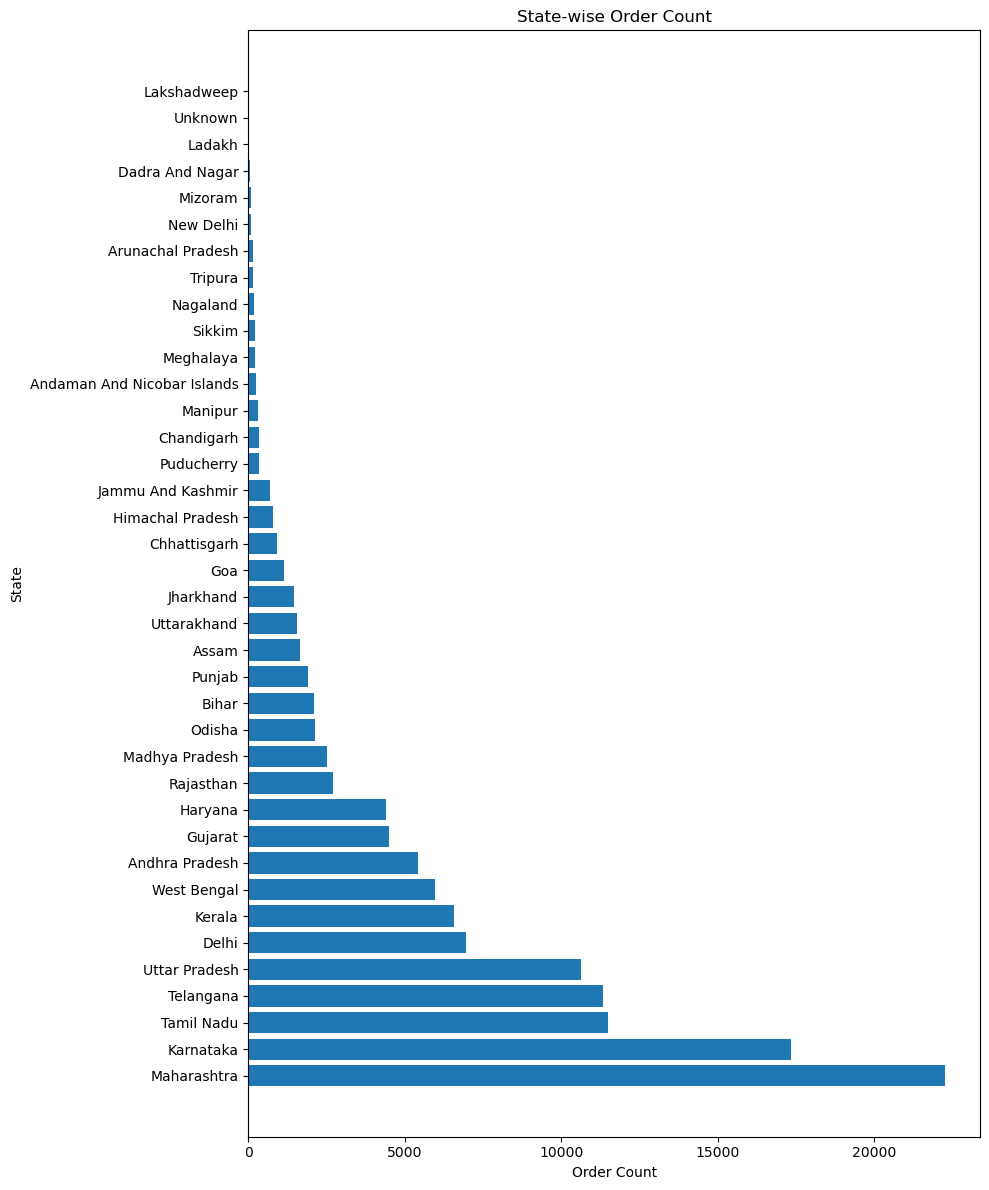

In [ ]:
state_orders = df['ship-state'].value_counts()

plt.figure(figsize=(10,12))
plt.barh(state_orders.index, state_orders.values)
plt.title("State-wise Order Count")
plt.xlabel("Order Count")
plt.ylabel("State")
plt.tight_layout()
plt.show()  

Category wise Product Count

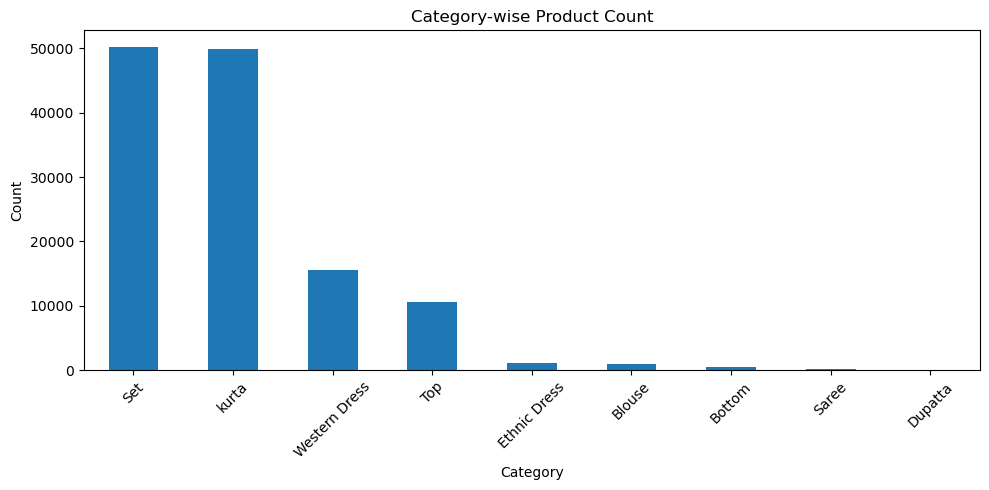

In [ ]:
plt.figure(figsize=(10,5))
df['Category'].value_counts().plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category-wise Product Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


STATE-WISE TOTAL SALES

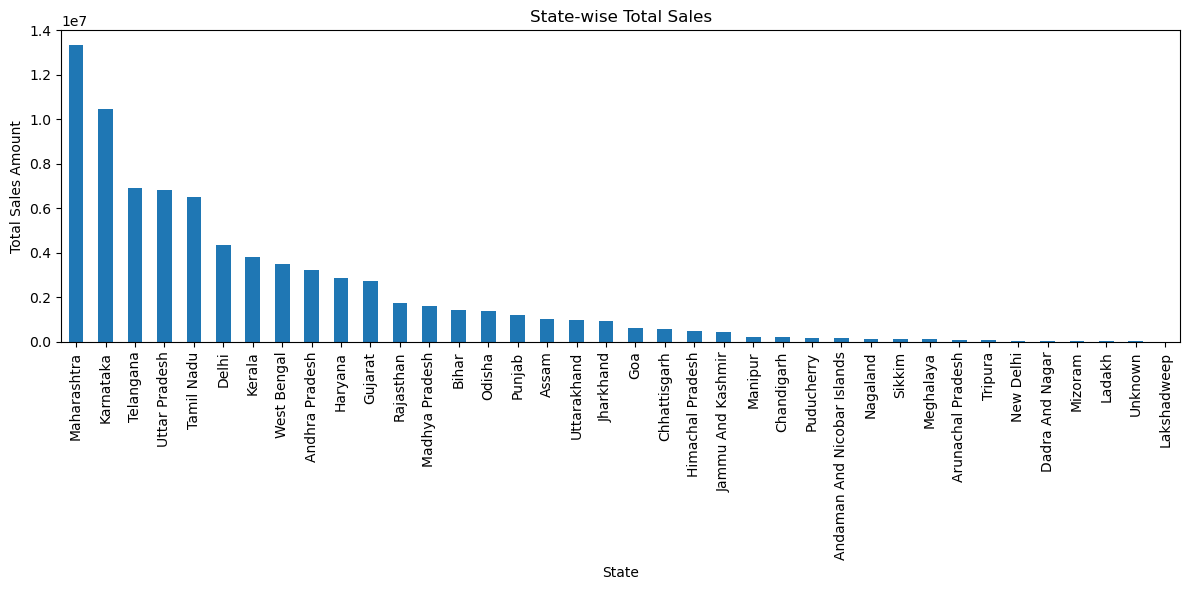

In [20]:
plt.figure(figsize=(12,6))
df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Total Sales Amount")
plt.title("State-wise Total Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Order Status Breakdown (Pie Chart)

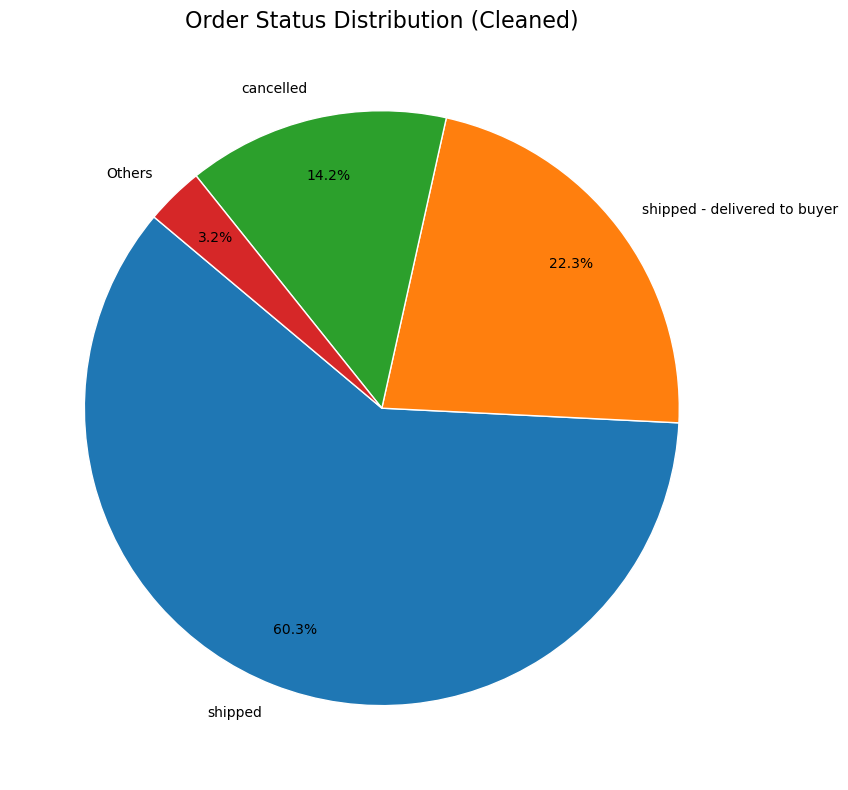

In [21]:
status_counts=df['Status'].value_counts()

# Group small categories into "Others"
threshold = 0.02  # Categories below 2% will be grouped
status_percent = status_counts / status_counts.sum()

main_status = status_percent[status_percent >= threshold]
other_status = status_percent[status_percent < threshold]

# Add "Others" if needed
if len(other_status) > 0:
    main_status["Others"] = other_status.sum()

# Plot
plt.figure(figsize=(10, 8))

plt.pie(
    main_status.values,
    labels=main_status.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.8,
    labeldistance=1.1,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title("Order Status Distribution (Cleaned)", fontsize=16)
plt.tight_layout()
plt.show()


Average Order Value per Category (AOV)

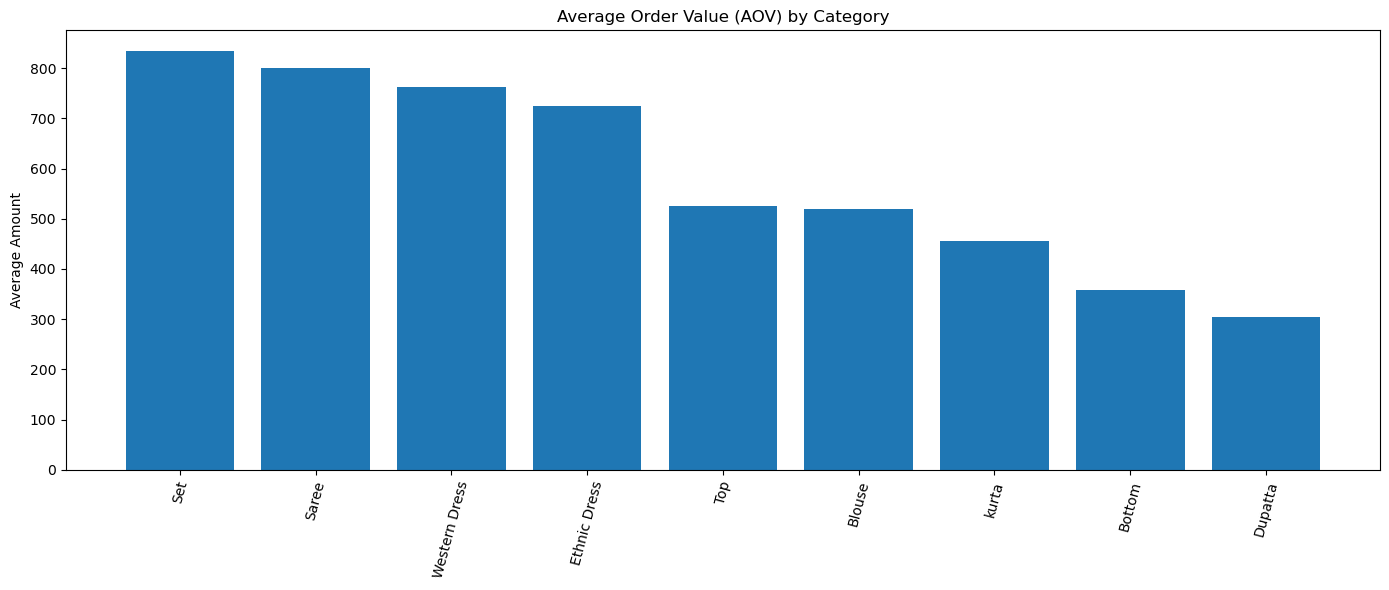

In [22]:
aov = df.groupby("Category")["Amount"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
plt.bar(aov.index, aov.values)
plt.xticks(rotation=75)
plt.title("Average Order Value (AOV) by Category")
plt.ylabel("Average Amount")
plt.tight_layout()
plt.show()
